<a href="https://colab.research.google.com/github/looohaar/ML-DL-Algorithms-from-scratch/blob/main/Machine%20Learning/Linear_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coding Linear Regression model from scratch**

**Equation for Linear Regression Model:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [ ]:
# Import libraries
import numpy as np

In [ ]:
class Linear_Regression():

  # Initialize learning rate and no. of iterations

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  # Function to fit the model

  def fit(self, X, Y):

    # Number of training examples and features

    self.m, self.n = X.shape

    # intializing the weights and bias

    self.w = np.zeros(self.n) # self.n refers to the number of features in the dataset
    self.b = 0
    self.X = X
    self.Y = Y

    # Implementing Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()

  # Function to update the weights and bias

  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # Calculate gradients

    dw = -(2* (self.X.T).dot(self.Y - Y_prediction))/ self.m

    db = -2 * np.sum(self.Y - Y_prediction)/ self.m

    # Update weights and bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db


  # Fuction to predict the new values

  def predict(self,X):
    return X.dot(self.w) + self.b



# **Using Linear Regression model for prediction**

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Data Pre-Precessing**

In [ ]:
# Load the data from csv file to pandas dataframe

salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
# Number of rows and colmns in the dataframe

salary_data.shape

(30, 2)

In [ ]:
# Checking for missing values

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# Split the feature and target

X = salary_data.iloc[:, :-1].values
Y = salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Splitting the dataset into tranining and test data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.33, random_state =2)

Training the Linear Regression model

In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# Values of weight and bias at the global minimum
print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


ie; y = 9514(X) + 23697


salary = 9514(experience) + 23697


**Predict the salary for test data**

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


**Visualizing the predicted values and actual values**

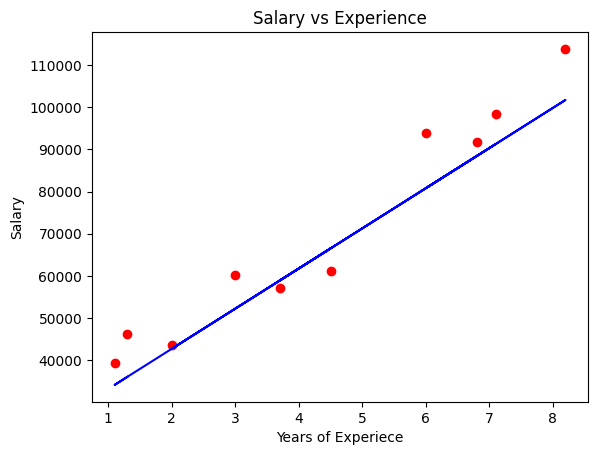

In [ ]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel('Years of Experiece')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()